<a href="https://colab.research.google.com/github/Kimbaeda/youngwoo/blob/main/7576_%ED%86%A0%EB%A7%88%ED%86%A0(2D_ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 문제
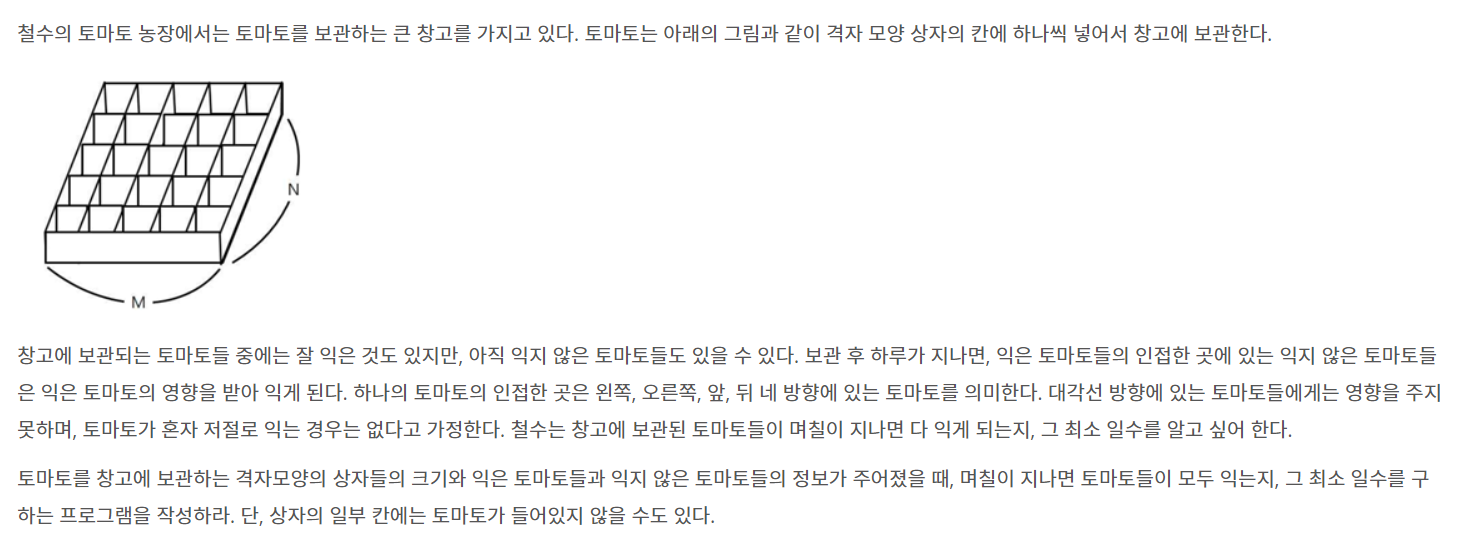

## 입력

첫 줄에는 상자의 크기를 나타내는 두 정수 M,N이 주어진다. M은 상자의 가로 칸의 수, N은 상자의 세로 칸의 수를 나타낸다. 단, 2 ≤ M,N ≤ 1,000 이다. 둘째 줄부터는 하나의 상자에 저장된 토마토들의 정보가 주어진다. 즉, 둘째 줄부터 N개의 줄에는 상자에 담긴 토마토의 정보가 주어진다. 하나의 줄에는 상자 가로줄에 들어있는 토마토의 상태가 M개의 정수로 주어진다. 정수 1은 익은 토마토, 정수 0은 익지 않은 토마토, 정수 -1은 토마토가 들어있지 않은 칸을 나타낸다.

토마토가 하나 이상 있는 경우만 입력으로 주어진다.

## 출력

여러분은 토마토가 모두 익을 때까지의 최소 날짜를 출력해야 한다. 만약, 저장될 때부터 모든 토마토가 익어있는 상태이면 0을 출력해야 하고, 토마토가 모두 익지는 못하는 상황이면 -1을 출력해야 한다.

## 예제 입력

```
예제 입력 1
6 4
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 1
```

```
예제 입력 2
6 4
0 -1 0 0 0 0
-1 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 1
```

```
예제 입력 3
6 4
1 -1 0 0 0 0
0 -1 0 0 0 0
0 0 0 0 -1 0
0 0 0 0 -1 1
```

```
예제 입력 4
5 5
-1 1 0 0 0
0 -1 -1 -1 0
0 -1 -1 -1 0
0 -1 -1 -1 0
0 0 0 0 0
```

```
예제 입력 5
2 2
1 -1
-1 1
```

## 예제 출력

```
예제 출력 1
8
```

```
예제 출력 2
-1
```

```
예제 출력 3
6
```

```
예제 출력 4
14
```

```
예제 출력 5
0
```

In [ ]:
# 출력 : 토마토가 모두 익을 때까지의 최소날짜 출력
#        만약, 저장될 때 부터 모든 토마토가 익어있는 상태라면 0출력
#        토마토가 모두 익지는 못하는 상황이면 -1출력

from collections import deque
checker = True 
M, N   = list(map(int, input().split())) # M : 넓이 , N : 높이
tomato = [] 
for _ in range(N):
    tomato.append(list(map(int, input().split()))) # [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1]]


q = deque() # 익은 토마토를 담을 큐 생성

for i in range(N):
    for j in range(M):
        if tomato[i][j] == 1: # 익은 토마토 큐에 추가
            q.append([i,j]) # deque([[3,5]])


dx = [0,0,1,-1] 
dy = [1,-1,0,0]
# dx[0],dy[0] = (0,1) 오른쪽
# dx[1],dy[1] = (0,-1) 왼쪽
# dx[2],dy[2] = (1,0) 아래쪽
# dx[3],dy[3] = (-1,0) 위쪽

time = -1   # 출력값 : 걸린 날짜
            # -1로 시작하는 이유는 bfs로 검사 했을경우 이미 다 익은 토마토인 경우에는 걸린날짜 0을 리턴해주기 위함

# bfs   
def bfs(q, time):    
    while q: # 큐가 빌때 까지 계속 돌음
        time += 1 
        for _ in range(len(q)): # 큐에 길이만큼 반복 왜냐하면 익은 토마토가 여러개 있을 수 있기 때문에
            a, b = q.popleft()
            
            for i in range(4):  # 상하좌우 확인
                nx = a + dx[i]
                ny = b + dy[i]
                
                if (0 <= nx < N) and (0 <= ny < M) and tomato[nx][ny] == 0: # 범위가 안넘어가면서 안익은 토마토일 경우 큐에 추가하고 익혀줌
                    q.append([nx, ny])
                    tomato[nx][ny] = 1
    return time

time = bfs(q, time)
               

for i in tomato: # tomato = [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
    if 0 in i: # i안에 0이 있을경우는 토마토가 모두 익지 못한경우이다.
        checker = False
        print(-1) # -1 출력
        break

if checker:
    print(time)

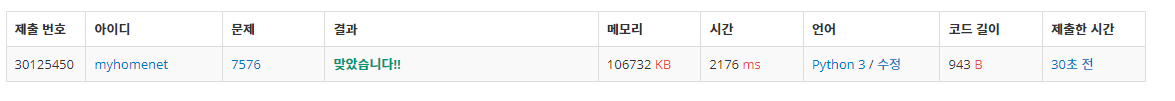